# Introduction

The dataset that we selected is the Bank Marketing Dataset which gives the information on a Portuguese financial institution's direct marketing campaigns. The purpose of the project is to get people to open a term deposit which is a form of savings account with a set period and interest rate. 

The dataset is sourced from UCI repository and contains 23 variables and 45211 observations.

The following are the columns definitions:

* age: age of the customer (numeric)
* age group: what age group does the customer belong to
* eligible: if the customer is eligible for the talk or not(binary: "yes", "no")
* job: what does the customer do (categorical: "admin", "unknown", "unemployed", "management", "housemaid", "enterpreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")
* salary: salary of the customer
* marital: marital status (categorical: "married", "divorced", "single")
* education: level of education completed (categorical: "unknown", "primary", "secondary", "tertiary")
* marital-education: married or educated/ non-educated
* targeted: if the customer or being targeted or not
* default: if the customer has credit in default(binary: "yes", "no")
* balance: remaining balance in their accounts (numeric)
* housing: has housing loan or not(binary: "yes", "no")
* loan: has prior loan (personal loan) or not
* contact: contact communication type (categorical: "unknown", "telephone", "cellular")
* day: last contact day of the month (numeric)
* month: last contact month of the year (categorical: "jan", "feb", ..., "dec")
* duration: number of days last contacted (numeric)
* campaign: number of contacts performed during this marketing campaign (numeric)
* pdays: number of days passed by after the client was last contacted from a previous campaign (numeric, -1 means the client was not previously contacted)
* previous: number of contacts performed before this campaign (numeric)
* poutcome: outcome of the previous marketing campaign (categorical: "unknown", "other", "failure", "success")
* y: has the client subscribed a term deposit (binary: "yes", "no")
* response: response of the client

### Goal:

The goal of this project is to predict if the client will subscribe a term deposit ("y") or not. The problem to solve in this project will be to see the type of the customers that take advantage of the marketing campaign offer. 

### Use:

This will assist banks to enhance the targeting of their marketing initiatives and overall conversion rates. Banks will in turn find this solution useful since it can help them improve their marketing efficacy and client engagement, resulting in higher revenue and customer satisfaction. Also knowing the factors that drive customer behavior can help banks better customize their products and services to their customer demands.

### Packages that are imported

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from xgboost import XGBClassifier



# 1. Read the dataset

### Using pandas to read bank-marketing.csv dataset as dataframe.

In [2]:
bankmarket = pd.read_csv('bank-marketing.csv')

In [11]:
pd.set_option('display.max_columns', 16)


In [21]:
bankmarket.iloc[:]

,age,age group,eligible,job,salary,marital,education,marital-education,...,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,5,Y,management,100000,married,tertiary,married-tertiary,...,may,261,1,-1,0,unknown,no,0
1,44,4,Y,technician,60000,single,secondary,single-secondary,...,may,151,1,-1,0,unknown,no,0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,...,may,76,1,-1,0,unknown,no,0
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,...,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,single-unknown,...,may,198,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,5,Y,technician,60000,married,tertiary,married-tertiary,...,nov,977,3,-1,0,unknown,yes,1
45207,71,7,N,retired,55000,divorced,primary,divorced-primary,...,nov,456,2,-1,0,unknown,yes,1
45208,72,7,N,retired,55000,married,secondary,married-secondary,...,nov,1127,5,184,3,success,yes,1
45209,57,5,Y,blue-collar,20000,married,secondary,married-secondary,...,nov,508,4,-1,0,unknown,no,0


In [4]:
bankmarket.shape

(45211, 23)

There are 45211 rows and 23 variables in the dataset.

## Review info() and describe() methods on bankmarket

In [22]:
bankmarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   age group          45211 non-null  int64 
 2   eligible           45211 non-null  object
 3   job                45211 non-null  object
 4   salary             45211 non-null  int64 
 5   marital            45211 non-null  object
 6   education          45211 non-null  object
 7   marital-education  45211 non-null  object
 8   targeted           45211 non-null  object
 9   default            45211 non-null  object
 10  balance            45211 non-null  int64 
 11  housing            45211 non-null  object
 12  loan               45211 non-null  object
 13  contact            45211 non-null  object
 14  day                45211 non-null  int64 
 15  month              45211 non-null  object
 16  duration           45211 non-null  int64

In [23]:
bankmarket.dtypes

age                   int64
age group             int64
eligible             object
job                  object
salary                int64
marital              object
education            object
marital-education    object
targeted             object
default              object
balance               int64
housing              object
loan                 object
contact              object
day                   int64
month                object
duration              int64
campaign              int64
pdays                 int64
previous              int64
poutcome             object
y                    object
response              int64
dtype: object

In [24]:
bankmarket.describe()

,age,age group,salary,balance,day,duration,campaign,pdays,previous,response
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,3.645861,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,1.083271,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,1.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,3.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,3.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,4.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,9.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


## Check data for missing values

In [25]:
bankmarket.isnull().sum()

age                  0
age group            0
eligible             0
job                  0
salary               0
marital              0
education            0
marital-education    0
targeted             0
default              0
balance              0
housing              0
loan                 0
contact              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
y                    0
response             0
dtype: int64

No missing values are found in the dataset.

# 2. Exploratory Data Analysis

### Data Visualization

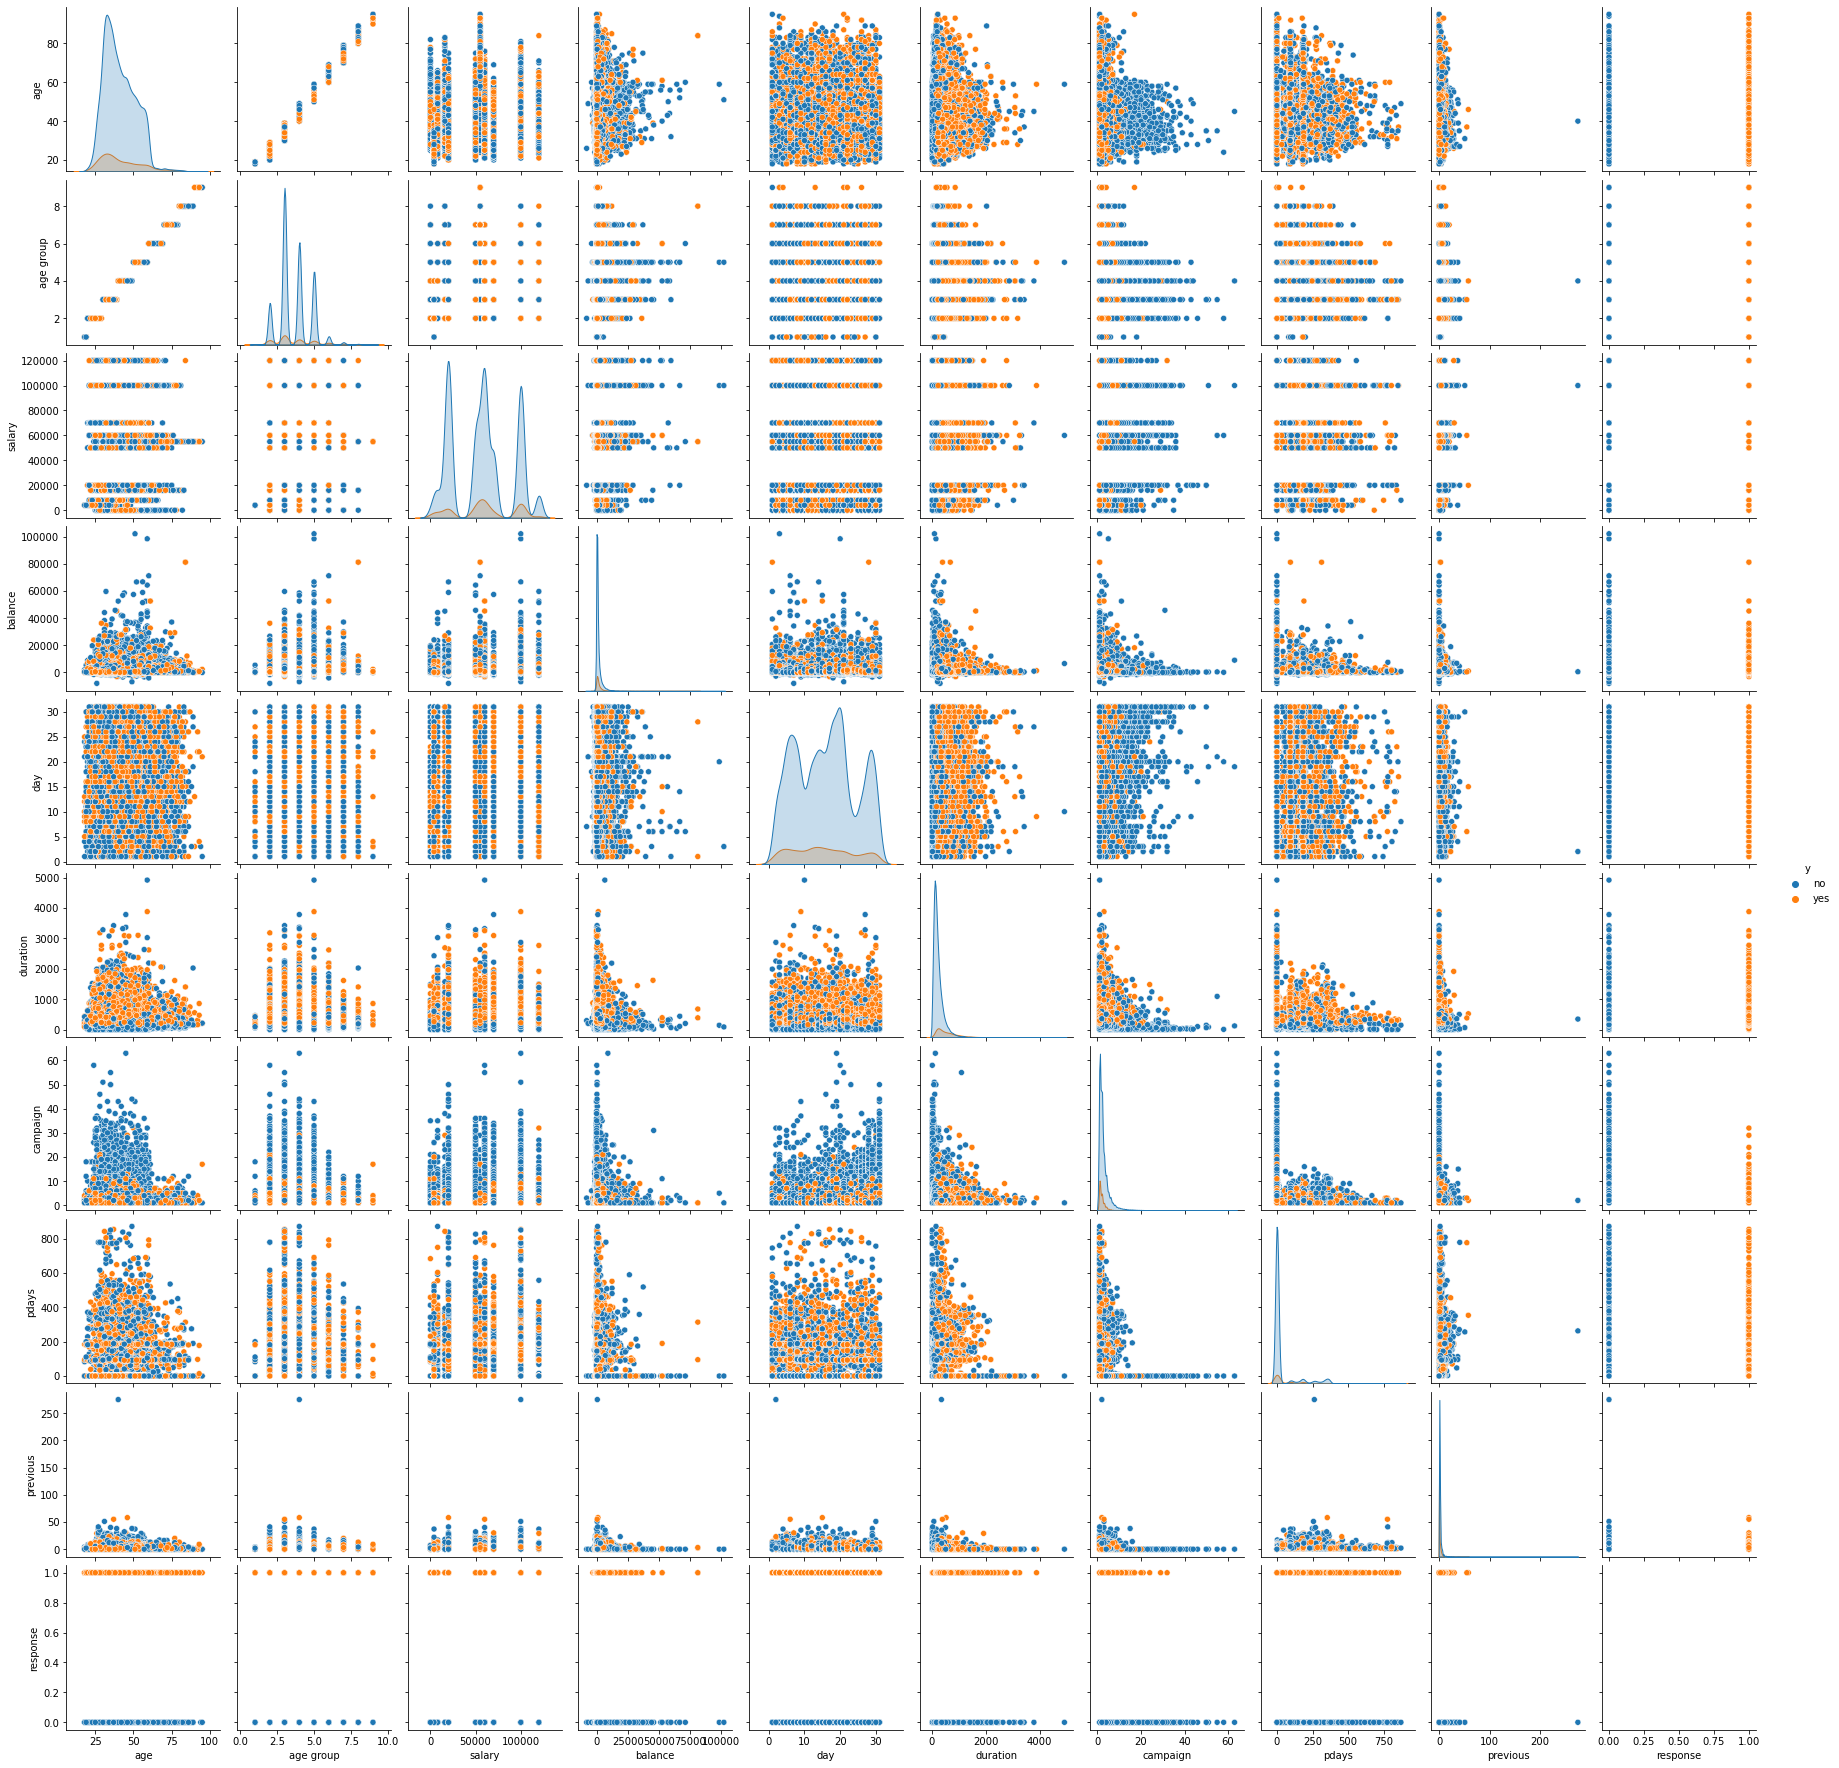

In [26]:
sns.pairplot(bankmarket, hue='y')

The graph above visualizes "y" which is our target variable based on all the other variables in the dataset. From this, we can see whether there is a yes or no for the client. 

### Age and Loan - to check what age-group people take more loans.

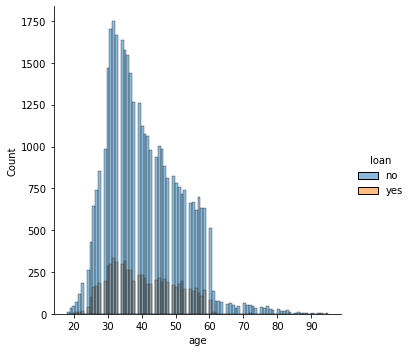

In [27]:
sns.displot(bankmarket, x = 'age', hue = 'loan')

Looking at the above plot, we can see that most of the people who take loan compared to the other ages are from 30-40 years of age group.

### Histogram showing age distribution - shows that major number of people targeted and opting for loans are middle aged.

<AxesSubplot:xlabel='age', ylabel='Density'>

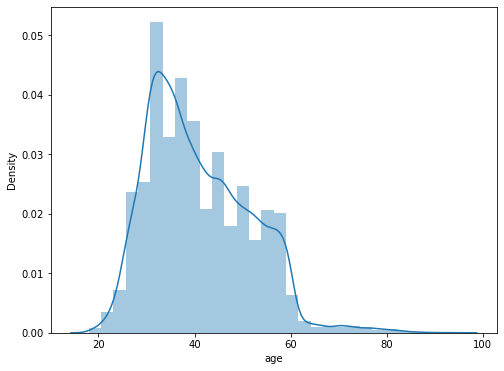

In [28]:
agedist = plt.figure(figsize=(8,6))
sns.distplot(bankmarket['age'], bins = 30)

### Distribution of Job - shows the composition of job types

<AxesSubplot:xlabel='job', ylabel='count'>

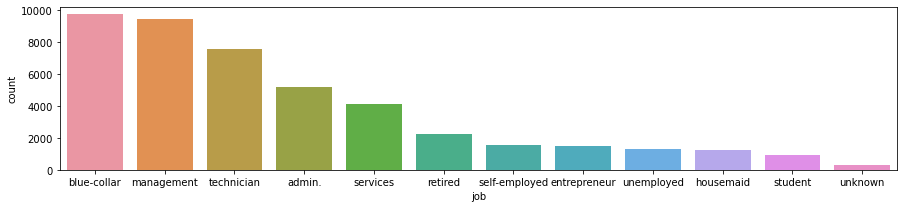

In [29]:
plt.figure(figsize = (15,3))
sns.countplot(data = bankmarket, x = 'job', order = bankmarket['job'].value_counts().index)

<AxesSubplot:xlabel='job', ylabel='age'>

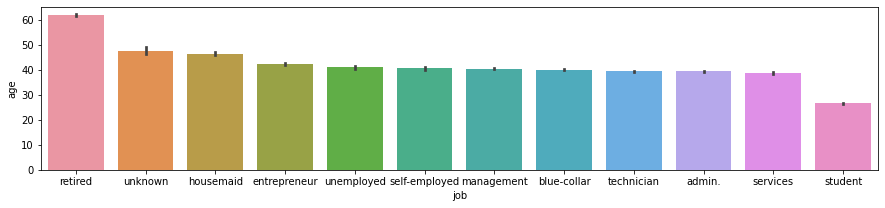

In [13]:
mean_ages = bankmarket.groupby('job')['age'].mean().sort_values(ascending=False)

# Get the ordered job categories based on the mean ages
ordered_jobs = mean_ages.index.tolist()
plt.figure(figsize = (15,3))
sns.barplot(data = bankmarket, x = 'job', y = 'age',order=ordered_jobs)

### Job and salary relationship

<AxesSubplot:xlabel='job', ylabel='salary'>

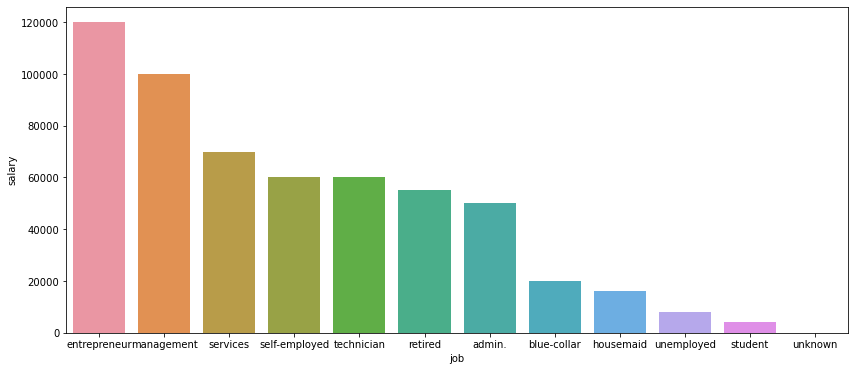

In [14]:
mean_sal = bankmarket.groupby('job')['salary'].mean().sort_values(ascending=False)

# Get the ordered job categories based on the mean ages
ordered_jobs = mean_sal.index.tolist()
jsrel = plt.figure(figsize=(14, 6))
sns.barplot(x = 'job', y = 'salary', data = bankmarket,order=ordered_jobs)

The plot above shows that Entrepreneur out of all makes the most.

### Correlation 

In [15]:
bankmarketCorr = bankmarket.corr()
bankmarketCorr

,age,age group,salary,balance,day,duration,campaign,pdays,previous,response
age,1.000000,0.963942,0.024357,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
age group,0.963942,1.000000,0.029469,0.095651,-0.005646,-0.006812,0.006227,-0.021921,0.002780,0.023382
salary,0.024357,0.029469,1.000000,0.055469,0.027864,-0.009937,0.015005,-0.014968,0.014564,0.020012
balance,0.097783,0.095651,0.055469,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,-0.005646,0.027864,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,-0.006812,-0.009937,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,0.006227,0.015005,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,-0.021921,-0.014968,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.002780,0.014564,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
response,0.025155,0.023382,0.020012,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

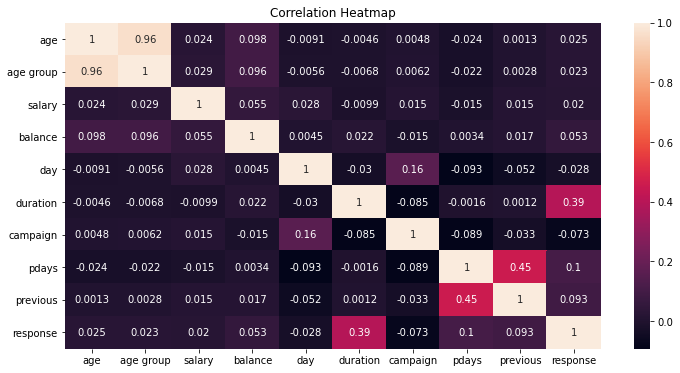

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(bankmarketCorr,annot=True)
plt.title('Correlation Heatmap')

## 3. Data Cleaning 

Decided to drop the "age group", "day" and "duration' variables as they were not adding much to the analysis.

In [30]:
bm_new = bankmarket.drop(['age group', 'day'], axis=1)
bm_new.head()

,age,eligible,job,salary,marital,education,marital-education,targeted,...,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,Y,management,100000,married,tertiary,married-tertiary,yes,...,may,261,1,-1,0,unknown,no,0
1,44,Y,technician,60000,single,secondary,single-secondary,yes,...,may,151,1,-1,0,unknown,no,0
2,33,Y,entrepreneur,120000,married,secondary,married-secondary,yes,...,may,76,1,-1,0,unknown,no,0
3,47,Y,blue-collar,20000,married,unknown,married-unknown,no,...,may,92,1,-1,0,unknown,no,0
4,33,Y,unknown,0,single,unknown,single-unknown,no,...,may,198,1,-1,0,unknown,no,0


Drop target variable (y)

In [31]:
bm_new.drop(['y'], axis=1)

,age,eligible,job,salary,marital,education,marital-education,targeted,...,contact,month,duration,campaign,pdays,previous,poutcome,response
0,58,Y,management,100000,married,tertiary,married-tertiary,yes,...,unknown,may,261,1,-1,0,unknown,0
1,44,Y,technician,60000,single,secondary,single-secondary,yes,...,unknown,may,151,1,-1,0,unknown,0
2,33,Y,entrepreneur,120000,married,secondary,married-secondary,yes,...,unknown,may,76,1,-1,0,unknown,0
3,47,Y,blue-collar,20000,married,unknown,married-unknown,no,...,unknown,may,92,1,-1,0,unknown,0
4,33,Y,unknown,0,single,unknown,single-unknown,no,...,unknown,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,Y,technician,60000,married,tertiary,married-tertiary,yes,...,cellular,nov,977,3,-1,0,unknown,1
45207,71,N,retired,55000,divorced,primary,divorced-primary,yes,...,cellular,nov,456,2,-1,0,unknown,1
45208,72,N,retired,55000,married,secondary,married-secondary,yes,...,cellular,nov,1127,5,184,3,success,1
45209,57,Y,blue-collar,20000,married,secondary,married-secondary,yes,...,telephone,nov,508,4,-1,0,unknown,0


### Check class counts

In [32]:
#to check class counts
y = bankmarket.response
y.value_counts()

0    39922
1     5289
Name: response, dtype: int64

definite class imbalance problem above 

In [33]:
bm_new.dtypes

age                   int64
eligible             object
job                  object
salary                int64
marital              object
education            object
marital-education    object
targeted             object
default              object
balance               int64
housing              object
loan                 object
contact              object
month                object
duration              int64
campaign              int64
pdays                 int64
previous              int64
poutcome             object
y                    object
response              int64
dtype: object

### Apply hot encoding to convert categorical variables to numerical variables

In [34]:
#convert 
'''
job_onehot = pd.get_dummies(bm_new['job'])
marital_onehot = pd.get_dummies(bm_new['marital'])
edu_onehot = pd.get_dummies(bm_new['education'])
marital_ed_onehot = pd.get_dummies(bm_new['marital-education'])
target_onehot = pd.get_dummies(bm_new['targeted'])
def_onehot = pd.get_dummies(bm_new['default'])
loan_onehot = pd.get_dummies(bm_new['housing'])
'''
object_cols = bankmarket.select_dtypes(include=['object']).columns
print(object_cols)

Index(['eligible', 'job', 'marital', 'education', 'marital-education',
       'targeted', 'default', 'housing', 'loan', 'contact', 'month',
       'poutcome', 'y'],
      dtype='object')


In [35]:
df=pd.DataFrame(bm_new)
# create dummy variables for each column
for col in object_cols:
    dummies = pd.get_dummies(bm_new[col], prefix=col)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(col, axis=1)

print(df.head())

   age  salary  balance  duration  campaign  pdays  previous  response  ...  \
0   58  100000     2143       261         1     -1         0         0  ...   
1   44   60000       29       151         1     -1         0         0  ...   
2   33  120000        2        76         1     -1         0         0  ...   
3   47   20000     1506        92         1     -1         0         0  ...   
4   33       0        1       198         1     -1         0         0  ...   

   month_oct  month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0          0          0                 0               0                 0   
1          0          0                 0               0                 0   
2          0          0                 0               0                 0   
3          0          0                 0               0                 0   
4          0          0                 0               0                 0   

   poutcome_unknown  y_no  y_yes  
0              

In [36]:
df.head()

,age,salary,balance,duration,campaign,pdays,previous,response,...,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,100000,2143,261,1,-1,0,0,...,0,0,0,0,0,1,1,0
1,44,60000,29,151,1,-1,0,0,...,0,0,0,0,0,1,1,0
2,33,120000,2,76,1,-1,0,0,...,0,0,0,0,0,1,1,0
3,47,20000,1506,92,1,-1,0,0,...,0,0,0,0,0,1,1,0
4,33,0,1,198,1,-1,0,0,...,0,0,0,0,0,1,1,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 70 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   45211 non-null  int64
 1   salary                                45211 non-null  int64
 2   balance                               45211 non-null  int64
 3   duration                              45211 non-null  int64
 4   campaign                              45211 non-null  int64
 5   pdays                                 45211 non-null  int64
 6   previous                              45211 non-null  int64
 7   response                              45211 non-null  int64
 8   eligible_N                            45211 non-null  uint8
 9   eligible_Y                            45211 non-null  uint8
 10  job_admin.                            45211 non-null  uint8
 11  job_blue-collar                       452

### Checking correlation with dummy variables
#### not possible to interpret

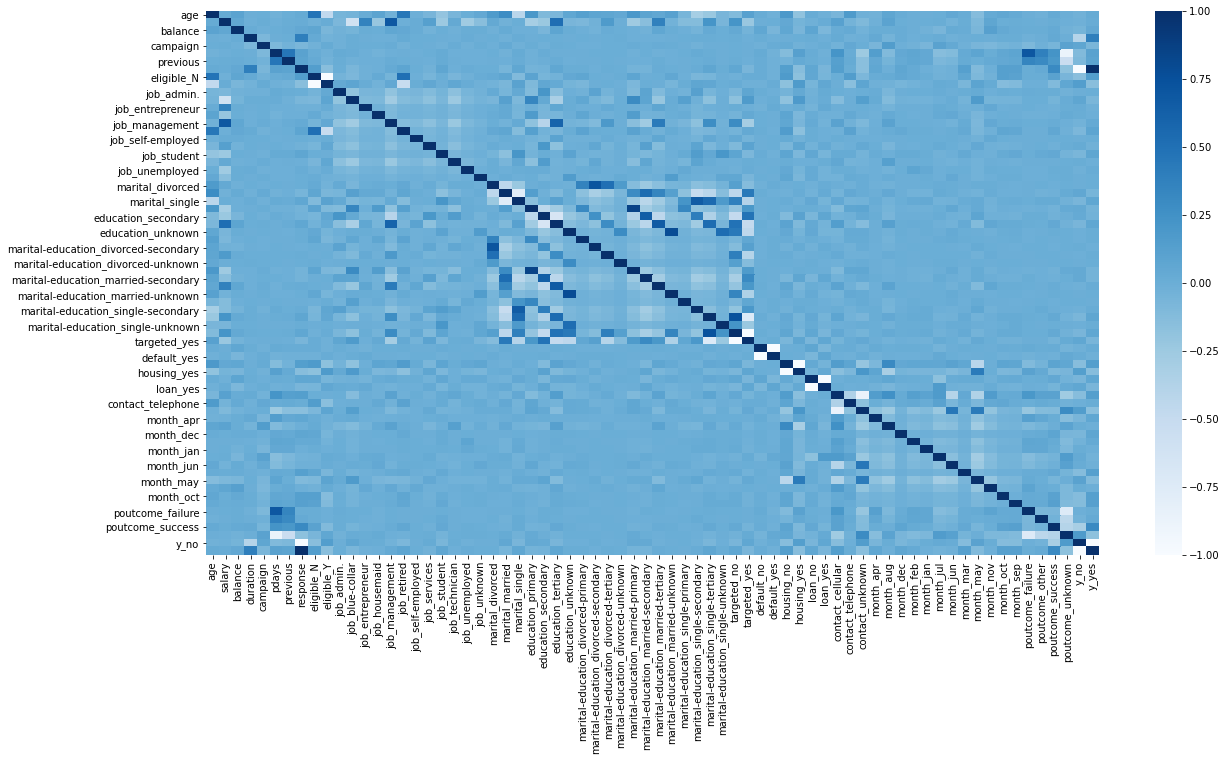

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=False,cmap="Blues");

### Not much correlation between features

In [26]:
### Histogtram Features with respect to class labels 1 AND 0

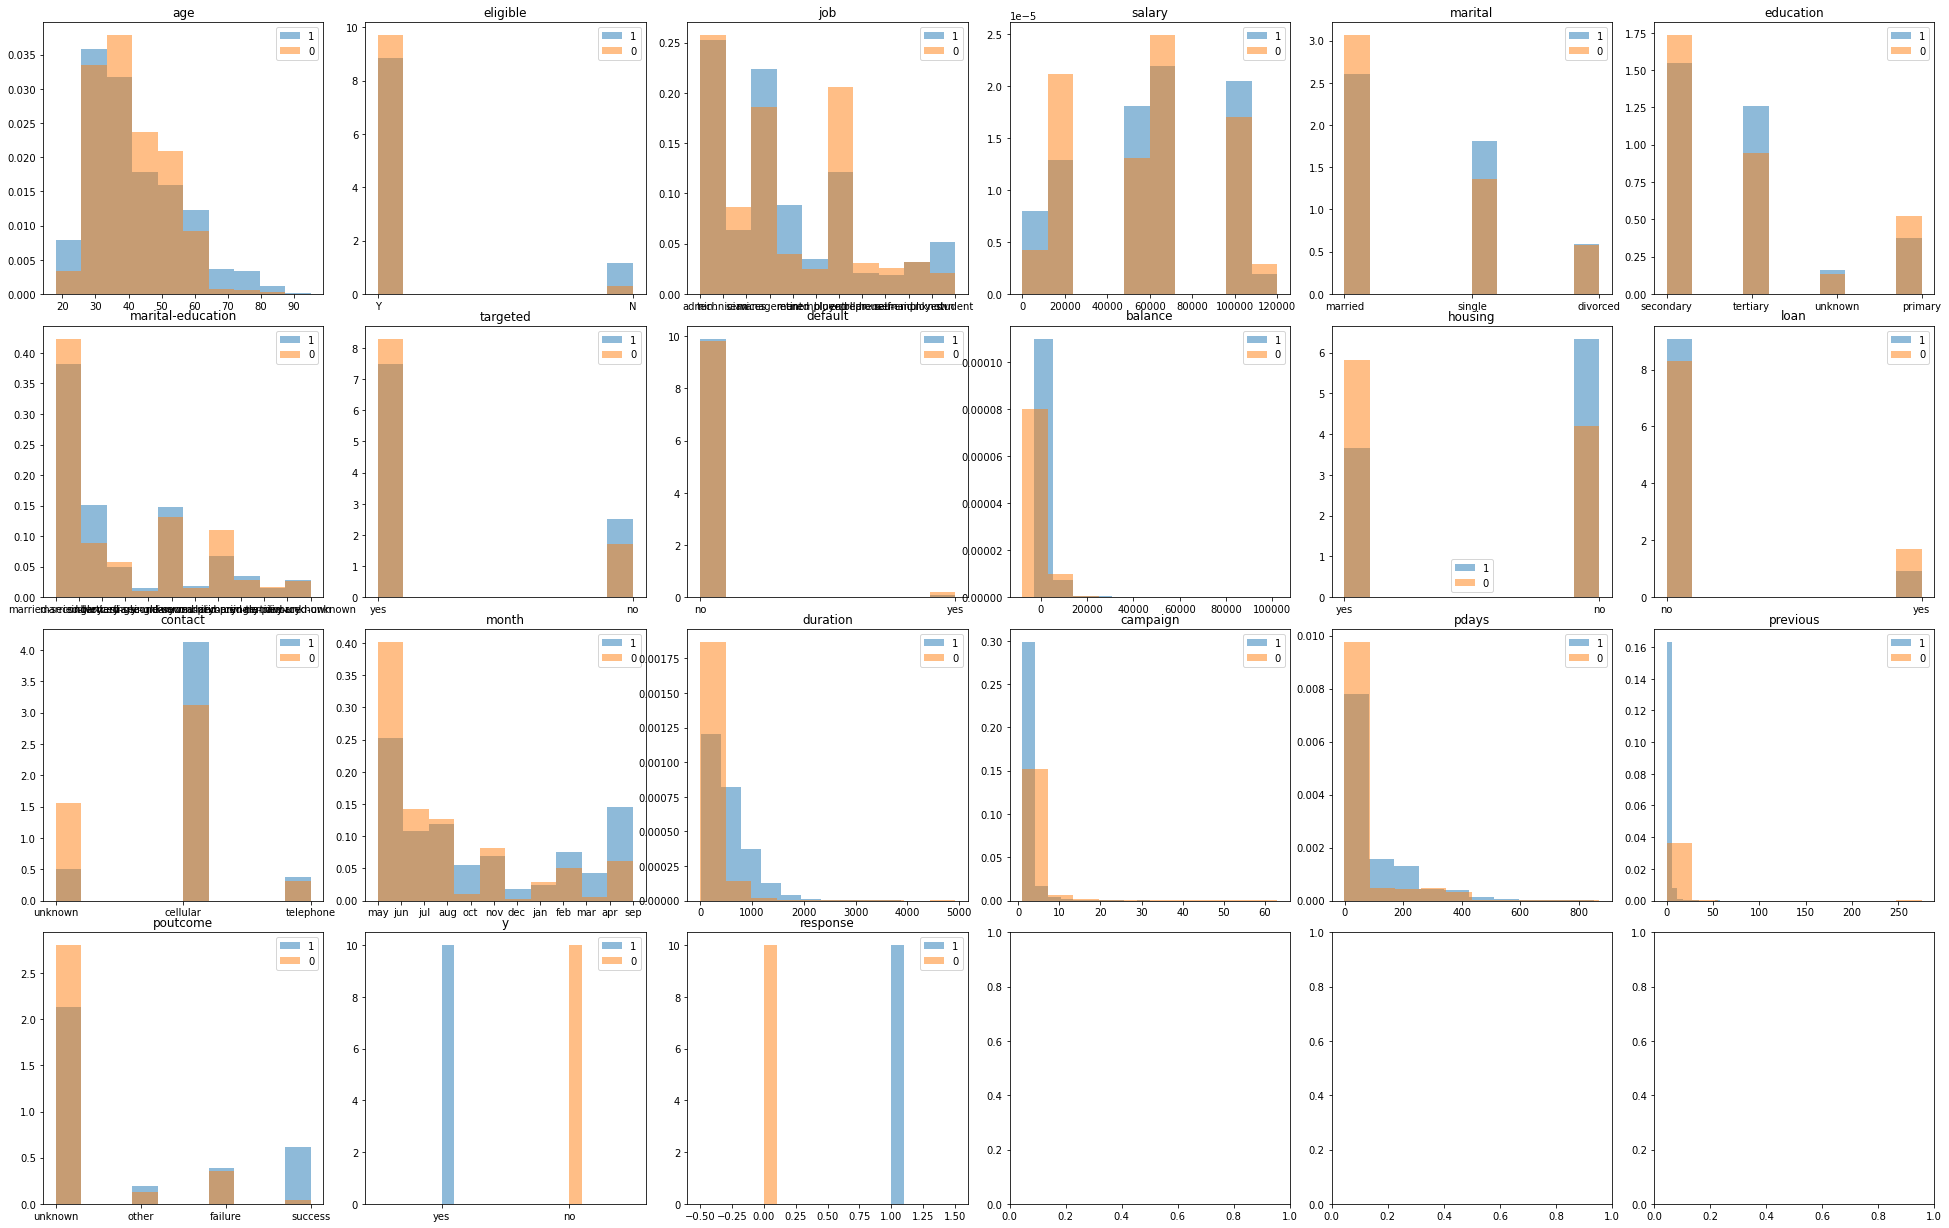

In [27]:
rows=4
columns=6
data_satisfied = bm_new[bm_new['response'] == 1]
data_not_satisfied = bm_new[bm_new['response'] == 0]

# Set up the plot grid
fig, axs = plt.subplots(rows, columns, figsize=(27, 17))
fig.tight_layout()
column_names = [column for column in bm_new]       # Get column names into list

# Loop through each column and plot the distribution for who said yes and no
for i, col in enumerate(column_names):
    row_idx = i // columns
    col_idx = i % columns
    axs[row_idx, col_idx].hist(data_satisfied[col], alpha=0.5, density=True)
    axs[row_idx, col_idx].hist(data_not_satisfied[col], alpha=0.5, density=True)
    axs[row_idx, col_idx].set(title=col)
    axs[row_idx, col_idx].legend(['1', '0'])

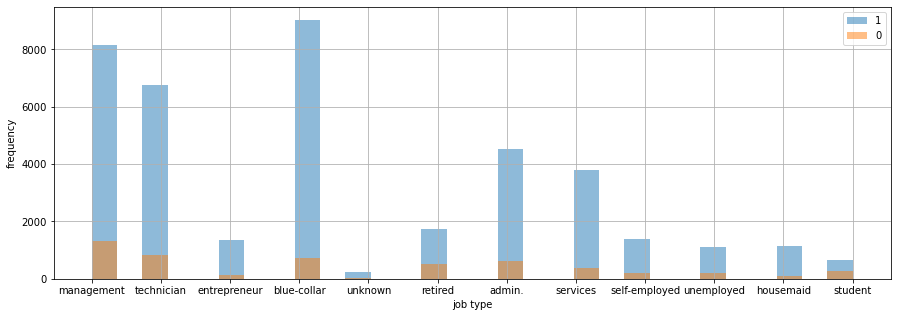

In [28]:

plt.figure(figsize=(15,5))

bankmarket[bankmarket['response'] == 0]['job'].hist(alpha=0.5, bins=30, label='1')
bankmarket[bankmarket['response'] == 1]['job'].hist(alpha=0.5, bins=30, label='0')
plt.legend()
plt.ylabel('frequency')
plt.xlabel('job type')


plt.show()

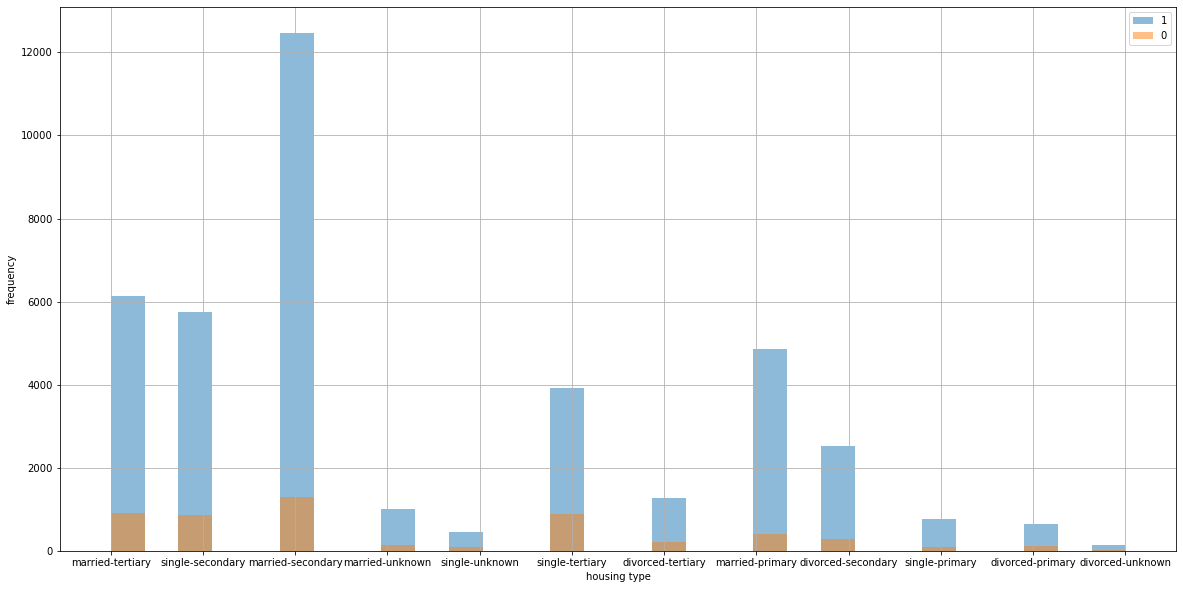

In [29]:
plt.figure(figsize=(20,10))
bankmarket[bankmarket['response'] == 0]['marital-education'].hist(alpha=0.5, bins=30, label='1')
bankmarket[bankmarket['response'] == 1]['marital-education'].hist(alpha=0.5, bins=30, label='0')
plt.legend()
plt.ylabel('frequency')
plt.xlabel('housing type')


plt.show()

<AxesSubplot:xlabel='response', ylabel='count'>

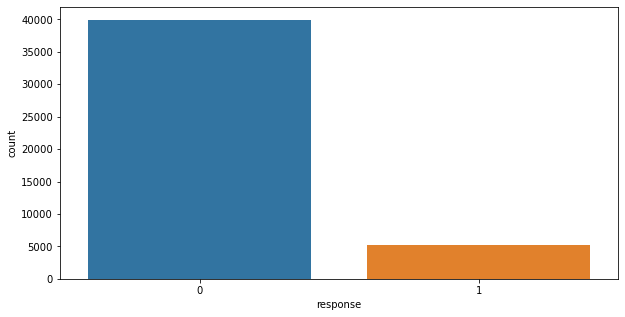

In [30]:
plt.figure(figsize = (10,5))
sns.countplot(data = bankmarket, x = 'response', order = bankmarket['response'].value_counts().index)

<AxesSubplot:xlabel='response', ylabel='count'>

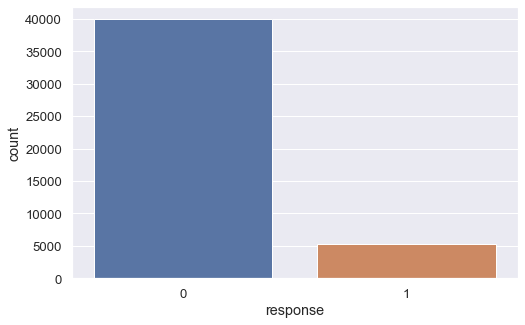

In [31]:
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 5))
sns.countplot(data=bankmarket, x='response', order=bankmarket['response'].value_counts().index)


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 70 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   45211 non-null  int64
 1   salary                                45211 non-null  int64
 2   balance                               45211 non-null  int64
 3   duration                              45211 non-null  int64
 4   campaign                              45211 non-null  int64
 5   pdays                                 45211 non-null  int64
 6   previous                              45211 non-null  int64
 7   response                              45211 non-null  int64
 8   eligible_N                            45211 non-null  uint8
 9   eligible_Y                            45211 non-null  uint8
 10  job_admin.                            45211 non-null  uint8
 11  job_blue-collar                       452

In [40]:
X=df.drop(['response','y_no','y_yes'],axis=1)

In [41]:
X.head()

,age,salary,balance,duration,campaign,pdays,previous,eligible_N,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,100000,2143,261,1,-1,0,0,...,1,0,0,0,0,0,0,1
1,44,60000,29,151,1,-1,0,0,...,1,0,0,0,0,0,0,1
2,33,120000,2,76,1,-1,0,0,...,1,0,0,0,0,0,0,1
3,47,20000,1506,92,1,-1,0,0,...,1,0,0,0,0,0,0,1
4,33,0,1,198,1,-1,0,0,...,1,0,0,0,0,0,0,1


### TEST TRAIN SPLIT

In [42]:
#train test split
RANDOM_STATE = 33

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=RANDOM_STATE)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=RANDOM_STATE)

In [53]:
def print_scores(name, fitted_estimator, X, y_true):
   
    y_pred = fitted_estimator.predict(X)
    
    accuracy= metrics.accuracy_score(y_true, y_pred)
    bal_accu=metrics.balanced_accuracy_score(y_true, y_pred)
    f1score=metrics.f1_score(y_true, y_pred, average="binary")
    recall=metrics.recall_score(y_true, y_pred, pos_label=1)
    precision=metrics.precision_score(y_true, y_pred, pos_label=1)
    specificity=metrics.recall_score(y_true, y_pred, pos_label=0)
    
    print("Accuracy.....: {:.3f}".format(accuracy))
    print("Bal. Accuracy: {:.3f}".format(bal_accu))
    print("F-1 Score....: {:.3f}".format(f1score))
    print("Recall.......: {:.3f}".format(recall))
    print("Precision....: {:.3f}".format(precision))
    print("Specificity..: {:.3f}".format(specificity))
    
    metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize='all').plot(cmap='Blues', values_format='.2f', xticks_rotation='vertical')
    plt.grid(False)



### Decision Tree

In [44]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

dt.fit(X_train,y_train)

#Accuracy Train
pred_train = dt.predict(X_train)
print("Accuracy Score (Train): ", metrics.accuracy_score(y_true = y_train, y_pred = pred_train))

#Accuracy Val
pred = dt.predict(X_val)
print("Accuracy Score (Val): ", metrics.accuracy_score(y_true = y_val, y_pred = pred))

Accuracy Score (Train):  1.0
Accuracy Score (Val):  0.8707144437071445


In [45]:
print(metrics.classification_report(y_val, pred))



              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7994
           1       0.45      0.47      0.46      1048

    accuracy                           0.87      9042
   macro avg       0.69      0.70      0.69      9042
weighted avg       0.87      0.87      0.87      9042



Accuracy.....: 0.871
Bal. Accuracy: 0.697
F-1 Score....: 0.458
Recall.......: 0.470
Precision....: 0.445
Specificity..: 0.923


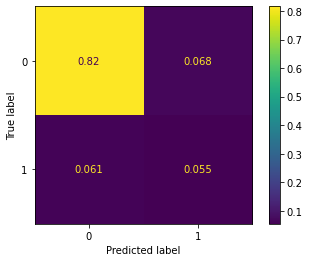

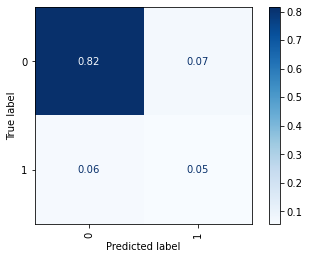

In [54]:
print_scores('Decision tree',dt, X_val, y_val)



### Decision Tree with Hyper-parameter tuning

In [40]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

params = dict(
    min_samples_split = [5, 10, 20, 30, 40, 50],
    max_depth = [1,2,3,None],
)

dt = DecisionTreeClassifier()
gs_dt = GridSearchCV(estimator=dt, param_grid=params, scoring='accuracy', cv=cv, n_jobs=-1, )

# fit the model
gs_dt.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, None],
                         'min_samples_split': [5, 10, 20, 30, 40, 50]},
             scoring='accuracy')

In [41]:
# To get the best estimator
gs_dt.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_split=5)

In [42]:
best_estimator_dt =gs_dt.best_estimator_

In [43]:
# Predicting on test set
gs_dt_pred = best_estimator_dt.predict(X_test)
print('Accuracy of test set: ', metrics.accuracy_score(y_test, gs_dt_pred))

Accuracy of test set:  0.9061152272475949


In [44]:
# computing classification report and calculating following metrics on testing set
print(metrics.classification_report(y_test, gs_dt_pred))
print('Recall : ', metrics.recall_score(y_test, gs_dt_pred, pos_label=1))
print('Specificity : ', metrics.recall_score(y_test, gs_dt_pred, pos_label=0))
print('Balanced accuracy : ', metrics.balanced_accuracy_score(y_test, gs_dt_pred) )

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8006
           1       0.68      0.34      0.46      1037

    accuracy                           0.91      9043
   macro avg       0.80      0.66      0.70      9043
weighted avg       0.89      0.91      0.89      9043

Recall :  0.3442622950819672
Specificity :  0.9788908318760929
Balanced accuracy :  0.66157656347903


### Random Forest

In [55]:
rf = RandomForestClassifier(random_state=RANDOM_STATE)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=33)

In [56]:

#Accuracy Train
pred_train1 = rf.predict(X_train)
print("Accuracy Score (Train): ", metrics.accuracy_score(y_true = y_train, y_pred = pred_train1))

#Accuracy Val
pred1 = rf.predict(X_val)
print("Accuracy Score (Val): ", metrics.accuracy_score(y_true = y_val, y_pred = pred1))

Accuracy Score (Train):  1.0
Accuracy Score (Val):  0.898363193983632


In [57]:
print(metrics.classification_report(y_val, pred1))



              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7994
           1       0.60      0.36      0.45      1048

    accuracy                           0.90      9042
   macro avg       0.76      0.67      0.70      9042
weighted avg       0.88      0.90      0.89      9042



Accuracy.....: 0.898
Bal. Accuracy: 0.665
F-1 Score....: 0.452
Recall.......: 0.362
Precision....: 0.603
Specificity..: 0.969


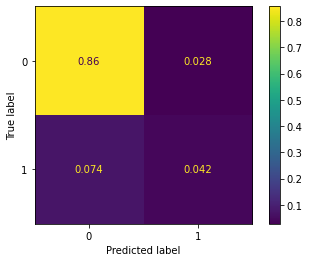

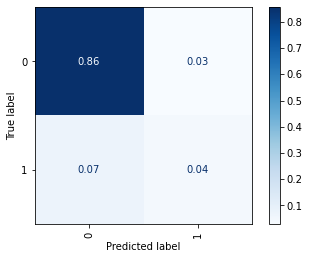

In [58]:
print_scores('Decision tree',rf, X_val, y_val)



### Random Forest with Hyper-parameter tunning

In [49]:
rf_gs = RandomForestClassifier()
parameters = {
    'min_samples_split' : [5, 10, 20, 25, 30, 40, 50],
    'n_estimators': [5, 50],
    'max_depth': [2, 4, 8, 16, None]
}

cv_rf_gs = GridSearchCV(estimator=rf_gs, param_grid=parameters, scoring='accuracy', cv=cv, n_jobs=-1,)

# Fit the model
cv_rf_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 8, 16, None],
                         'min_samples_split': [5, 10, 20, 25, 30, 40, 50],
                         'n_estimators': [5, 50]},
             scoring='accuracy')

In [50]:
# To get the best estimator
cv_rf_gs.best_estimator_

RandomForestClassifier(min_samples_split=5, n_estimators=50)

In [51]:
best_estimator_rf_gs =cv_rf_gs.best_estimator_

# Predicting on test set
rf_gs_pred = best_estimator_rf_gs.predict(X_test)
print('Accuracy of test set: ', metrics.accuracy_score(y_test, rf_gs_pred))

Accuracy of test set:  0.9085480482140883


In [52]:
# To get the confusion matrix
pd.DataFrame(metrics.confusion_matrix(y_test, rf_gs_pred))

,0,1
0,7809,197
1,630,407


In [53]:
# computing classification report and calculating following metrics on testing set
print(metrics.classification_report(y_test, rf_gs_pred))
print('Recall : ', metrics.recall_score(y_test, rf_gs_pred, pos_label=1))
print('Specificity : ', metrics.recall_score(y_test, rf_gs_pred, pos_label=0))
print('Balanced accuracy : ', metrics.balanced_accuracy_score(y_test, rf_gs_pred) )

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      8006
           1       0.67      0.39      0.50      1037

    accuracy                           0.91      9043
   macro avg       0.80      0.68      0.72      9043
weighted avg       0.90      0.91      0.90      9043

Recall :  0.39247830279652846
Specificity :  0.9753934549088183
Balanced accuracy :  0.6839358788526734


### SVM (Support Vector Machine)

In [54]:
 #Create SVM Classifier
svm_clf = svm.SVC(kernel='linear')
# Fit the model
svm_clf = svm_clf.fit(X_train, y_train)

In [55]:
# Predict the response for the test dataset
svm_pred = svm_clf.predict(X_test)

In [56]:
# Print the confusion matrix
svm_conf_matrix = confusion_matrix(y_test, svm_pred)
print(svm_conf_matrix)

In [57]:
# Plot the confusion matrix 
sns.heatmap(svm_conf_matrix, annot = True)

In [58]:
print("Accuracy Score: ", accuracy_score(y_test, svm_pred))
print("\n")
print("Classification Report: ")
print(metrics.classification_report(y_test, svm_pred))

### SVM with Hyperparameter tuning

In [59]:
#svc = SVC()
#parameters = {
    #'kernel': ['linear'],
    #'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
    #'C': [0.001, 0.01, 0.1, 1, 10]
#}

#grid_cv = GridSearchCV(svc, parameters, cv=5, n_jobs=-1)
#grid_cv.fit(X_train, y_train.values.ravel())

In [60]:
# Get the best estimators
#grid_cv.best_estimator_

In [61]:
# Predict using the best estimators.
#svm_pred_2 = grid_cv.best_estimator_.predict(X_test)

In [62]:
# Calclate and Print the Accuracy Score and Classification Report
#print("Accuracy Score:", accuracy_score(y_test, svm_pred_2) )
#print("\n")
#print("Classification Report: ")
#print(metrics.classification_report(y_test, svm_pred_2))

### K Nearest Neighbor (KNN)

In [63]:
# Applying KNN classifer using 5 neighbors
knn_clf = KNeighborsClassifier(n_neighbors = 5)

# Fit the model 
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [64]:
# Making prediction on test set
knn_pred = knn_clf.predict(X_test)

In [65]:
# Print Confusion Matrix
knn_matrix = confusion_matrix(y_test, knn_pred)
print(knn_matrix)

[[7728  278]
 [ 781  256]]


In [66]:
print("Accuracy Score: ", accuracy_score(y_test, knn_pred) )
print("\n")
print("Classification Report: ")
print(metrics.classification_report(y_test, knn_pred))

Accuracy Score:  0.8828928452947031


Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      8006
           1       0.48      0.25      0.33      1037

    accuracy                           0.88      9043
   macro avg       0.69      0.61      0.63      9043
weighted avg       0.86      0.88      0.87      9043



### KNN using hyperparameter tuning

In [67]:
# Define hyperparameters for tuning
knn_params = {
        'n_neighbors' : [3,5,7,10],
        'weights' : ['uniform', 'distance'],
        'metric' : ['euclidean', 'manhattan']
}

knn_cv = GridSearchCV(KNeighborsClassifier(), knn_params, verbose=1, cv=5, n_jobs=-1)

knn_cv.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 10],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [68]:
# Use best estimator
knn_cv.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [69]:
# Predict on the test set using the best estimate hyperparameters
knn_pred_2 = knn_cv.best_estimator_.predict(X_test)

In [70]:
# Print Accuracy Report and Classification Report
print("Accuracy Report:", accuracy_score(y_test, knn_pred_2) )
print ("\n")
print ("Classification Report:")
print(metrics.classification_report(y_test, knn_pred_2))

Accuracy Report: 0.8893066460245493


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8006
           1       0.57      0.14      0.22      1037

    accuracy                           0.89      9043
   macro avg       0.73      0.56      0.58      9043
weighted avg       0.86      0.89      0.86      9043



## XGBoost

In [71]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [72]:
pred_val = xgb.predict(X_test)

In [73]:
metrics.accuracy_score(y_test, pred_val) 

0.9081057171292712

In [74]:
pd.DataFrame(metrics.confusion_matrix(y_test, pred_val))

,0,1
0,7733,273
1,558,479


In [ ]:
print("Accuracy Score: ", accuracy_score(y_test, pred_val) )
print("\n")
print("Classification Report: ")
print(metrics.classification_report(y_test, pred_val))

In [75]:
# computing classification report and calculating following metrics on testing set
print(metrics.classification_report(y_test, pred_val))
print('Recall : ', metrics.recall_score(y_test, pred_val, pos_label=1))
print('Specificity : ', metrics.recall_score(y_test, pred_val, pos_label=0))
print('Balanced accuracy : ', metrics.balanced_accuracy_score(y_test, pred_val) )

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8006
           1       0.64      0.46      0.54      1037

    accuracy                           0.91      9043
   macro avg       0.78      0.71      0.74      9043
weighted avg       0.90      0.91      0.90      9043

Recall :  0.46190935390549664
Specificity :  0.9659005745690732
Balanced accuracy :  0.7139049642372849


### XGBoost with Hyper-parameter tunning 

In [76]:
# Using k=5 folds
k= 5
params = dict(
    n_estimators= [25], 
    max_leaves = [7,8],
    gamma = [0],
    max_depth = list(range(5,7))
)
params

{'n_estimators': [25], 'max_leaves': [7, 8], 'gamma': [0], 'max_depth': [5, 6]}

In [77]:
# Applying XGBoost classifier model
xg = XGBClassifier()
xg_gs = GridSearchCV(estimator=xg, param_grid=params, scoring='accuracy', cv=k, n_jobs=-1 )

# Fit the model
xg_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0], 'max_depth': [5, 6],
                         'max_leaves': [7, 8], 'n_estimators': [25]},
             scoring='accuracy')

In [78]:
best_estimator_xg = xg_gs.best_estimator_

# predicting on test data
xg_pred = best_estimator_xg.predict(X_test) 
metrics.accuracy_score(y_test, xg_pred) 

0.9082162999004755

In [79]:
pd.DataFrame(metrics.confusion_matrix(y_test, xg_pred))

,0,1
0,7765,241
1,589,448


In [80]:
# computing classification report and calculating following metrics on testing set
print(metrics.classification_report(y_test, xg_pred))
print('Recall : ', metrics.recall_score(y_test, xg_pred, pos_label=1))
print('Specificity : ', metrics.recall_score(y_test, xg_pred, pos_label=0))
print('Balanced accuracy : ', metrics.balanced_accuracy_score(y_test, xg_pred) )

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8006
           1       0.65      0.43      0.52      1037

    accuracy                           0.91      9043
   macro avg       0.79      0.70      0.73      9043
weighted avg       0.90      0.91      0.90      9043

Recall :  0.43201542912246865
Specificity :  0.969897576817387
Balanced accuracy :  0.7009565029699278


### Choosing the best fitted model for each of the classifiers 

In [81]:
# Decision Tree
accuracy_dt = metrics.accuracy_score(y_test, gs_dt_pred)
precision_dt = metrics.precision_score(y_test, gs_dt_pred)
balanced_dt = metrics.balanced_accuracy_score(y_test, gs_dt_pred)
recall_dt = metrics.recall_score(y_test, gs_dt_pred)
f1_dt = metrics.f1_score(y_test, gs_dt_pred)
specificity_dt = metrics.recall_score(y_test, gs_dt_pred, pos_label=0)

dtList = []
dtList.append('DecisionTree')
dtList.append(accuracy_dt)
dtList.append(f1_dt)
dtList.append(specificity_dt)
dtList.append(precision_dt)
dtList.append(recall_dt)
dtList.append(balanced_dt)

In [82]:
# Random Forest 
accuracy_rf = metrics.accuracy_score(y_test, rf_gs_pred)
precision_rf = metrics.precision_score(y_test, rf_gs_pred)
balanced_rf = metrics.balanced_accuracy_score(y_test, rf_gs_pred)
recall_rf = metrics.recall_score(y_test, rf_gs_pred)
f1_rf = metrics.f1_score(y_test, rf_gs_pred)
specificity_rf = metrics.recall_score(y_test, rf_gs_pred, pos_label=0)

rfList = []
rfList.append('RandomForest')
rfList.append(accuracy_rf)
rfList.append(f1_rf)
rfList.append(specificity_rf)
rfList.append(precision_rf)
rfList.append(recall_rf)
rfList.append(balanced_rf)

In [84]:
#SVM

accuracy_svm = metrics.accuracy_score(y_test, svm_pred_2)
precision_svm = metrics.precision_score(y_test, svm_pred_2)
balanced_svm = metrics.balanced_accuracy_score(y_test, svm_pred_2)
recall_svm = metrics.recall_score(y_test, svm_pred_2)
f1_svm = metrics.f1_score(y_test, svm_pred_2)
specificity_svm = metrics.recall_score(y_test,svm_pred_2, pos_label=0)

svmList = []
svmList.append('SVM')
svmList.append(accuracy_svm)
svmList.append(f1_svm)
svmList.append(specificity_svm)
svmList.append(precision_svm)
svmList.append(recall_svm)
svmList.append(balanced_svm)


"accuracy_svm = metrics.accuracy_score(y_test, svm_pred_2)\nprecision_svm = metrics.precision_score(y_test, svm_pred_2)\nbalanced_svm = metrics.balanced_accuracy_score(y_test, svm_pred_2)\nrecall_svm = metrics.recall_score(y_test, svm_pred_2)\nf1_svm = metrics.f1_score(y_test, svm_pred_2)\nspecificity_svm = metrics.recall_score(y_test,svm_pred_2, pos_label=0)\n\nsvmList = []\nsvmList.append('SVM')\nsvmList.append(accuracy_svm)\nsvmList.append(f1_svm)\nsvmList.append(specificity_svm)\nsvmList.append(precision_svm)\nsvmList.append(recall_svm)\nsvmList.append(balanced_svm)\n"

In [85]:
# KNN
accuracy_knn = metrics.accuracy_score(y_test, knn_pred_2)
precision_knn = metrics.precision_score(y_test, knn_pred_2)
balanced_knn = metrics.balanced_accuracy_score(y_test, knn_pred_2)
recall_knn = metrics.recall_score(y_test, knn_pred_2)
f1_knn = metrics.f1_score(y_test, knn_pred_2)
specificity_knn = metrics.recall_score(y_test, knn_pred_2, pos_label=0)

knnList = []
knnList.append('KNN')
knnList.append(accuracy_knn)
knnList.append(f1_knn)
knnList.append(specificity_knn)
knnList.append(precision_knn)
knnList.append(recall_knn)
knnList.append(balanced_knn)

In [86]:
# XGBoost
accuracy_xg = metrics.accuracy_score(y_test, xg_pred)
precision_xg = metrics.precision_score(y_test, xg_pred)
balanced_xg = metrics.balanced_accuracy_score(y_test, xg_pred)
recall_xg = metrics.recall_score(y_test, xg_pred)
f1_xg = metrics.f1_score(y_test, xg_pred)
specificity_xg = metrics.recall_score(y_test, xg_pred, pos_label=0)

xgList = []
xgList.append('XGBoost')
xgList.append(accuracy_xg)
xgList.append(f1_xg)
xgList.append(specificity_xg)
xgList.append(precision_xg)
xgList.append(recall_xg)
xgList.append(balanced_xg)

### Table Summary of the Results

In [87]:
tableList = []
tableList.append(svmList)
tableList.append(knnList)
tableList.append(dtList)
tableList.append(rfList)
tableList.append(xgList)

column_labels = ['classifier', 'accuracy', 'f1-score', 'specificity', 'precision', 'recall', 'balanced']
model = pd.DataFrame(tableList, columns = column_labels)
print(model)

     classifier  accuracy  f1-score  specificity  precision    recall  \
0           KNN  0.889307  0.224632     0.986385   0.570866  0.139826   
1  DecisionTree  0.906115  0.456814     0.978891   0.678707  0.344262   
2  RandomForest  0.908548  0.496039     0.975393   0.673841  0.392478   
3       XGBoost  0.908216  0.519119     0.969898   0.650218  0.432015   

   balanced  
0  0.563106  
1  0.661577  
2  0.683936  
3  0.700957  
